In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import warnings
warnings.filterwarnings('ignore')
sns.set(style ='whitegrid')

In [ ]:
df = pd.read_csv('data/AIML Dataset.csv')

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423045 entries, 0 to 423044
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            423045 non-null  int64  
 1   type            423045 non-null  object 
 2   amount          423045 non-null  float64
 3   nameOrig        423045 non-null  object 
 4   oldbalanceOrg   423044 non-null  float64
 5   newbalanceOrig  423044 non-null  float64
 6   nameDest        423044 non-null  object 
 7   oldbalanceDest  423044 non-null  float64
 8   newbalanceDest  423044 non-null  float64
 9   isFraud         423044 non-null  float64
 10  isFlaggedFraud  423044 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 35.5+ MB


In [ ]:
df["isFraud"].value_counts()

,count
isFraud,
0.0,422827
1.0,217


In [ ]:
df["isFlaggedFraud"].value_counts()

,count
isFlaggedFraud,
0.0,423044


In [ ]:
df.isnull().sum().sum()

np.int64(7)

In [ ]:
df.shape

(423045, 11)

In [ ]:
round((df["isFraud"].value_counts()[1] / df.shape[0])*100,2 )

np.float64(0.05)

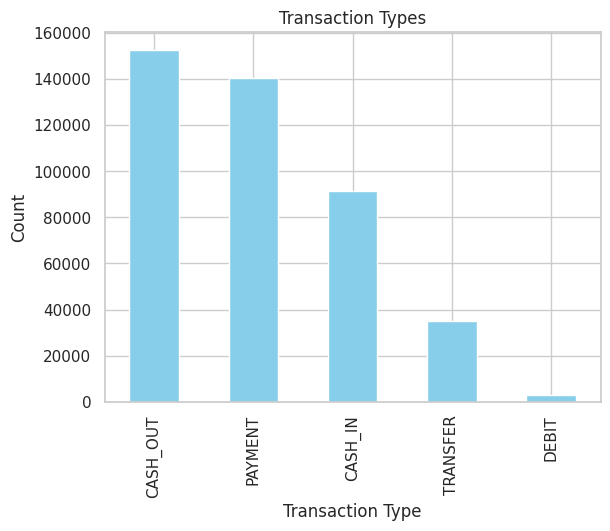

In [ ]:
df["type"].value_counts().plot(kind = 'bar',title="Transaction Types",color = "Skyblue")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()

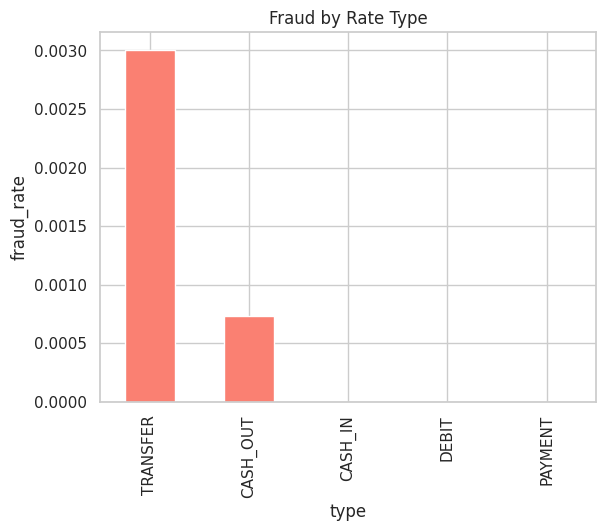

In [ ]:
fraud_by_type = df.groupby("type")["isFraud"].mean().sort_values(ascending=False)
fraud_by_type.plot(kind = 'bar',title="Fraud by Rate Type",color = "salmon")
plt.ylabel("fraud_rate")
plt.show()


In [ ]:
df["amount"].describe().astype(int)

,amount
count,423045
mean,171508
std,282832
min,0
25%,13498
50%,81937
75%,228609
max,10000000


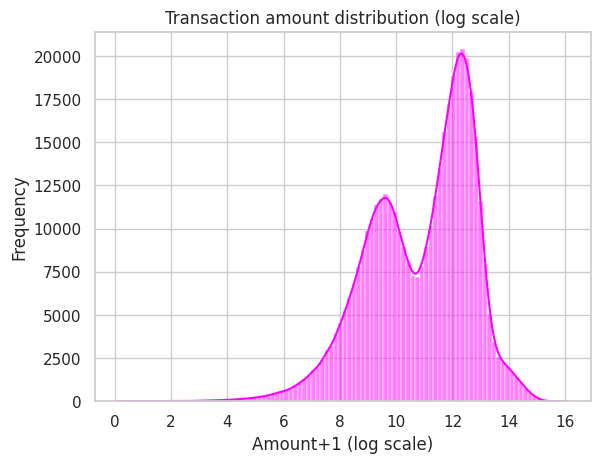

In [ ]:
sns.histplot(np.log1p(df["amount"]), bins = 100, kde=True,color="magenta")
plt.title("Transaction amount distribution (log scale)")
plt.xlabel("Amount+1 (log scale)")
plt.ylabel("Frequency")
plt.show()

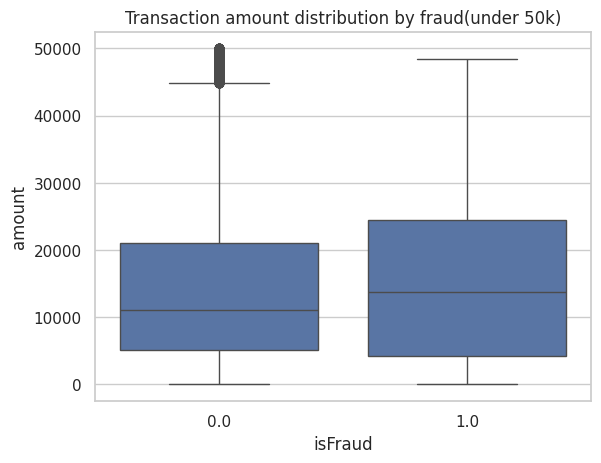

In [ ]:
sns.boxplot(data = df[df["amount"]<50000], x="isFraud",y = "amount")
plt.title("Transaction amount distribution by fraud(under 50k)")
plt.show()

In [ ]:
df["balanceDiffOrig"] = df['oldbalanceOrg'] - df['newbalanceOrig']
df["balanceDiffDest"] = df['newbalanceDest'] - df['oldbalanceDest']

In [ ]:
(df["balanceDiffOrig"]<0).sum()

np.int64(91603)

In [ ]:
(df["balanceDiffDest"]<0).sum()

np.int64(82862)

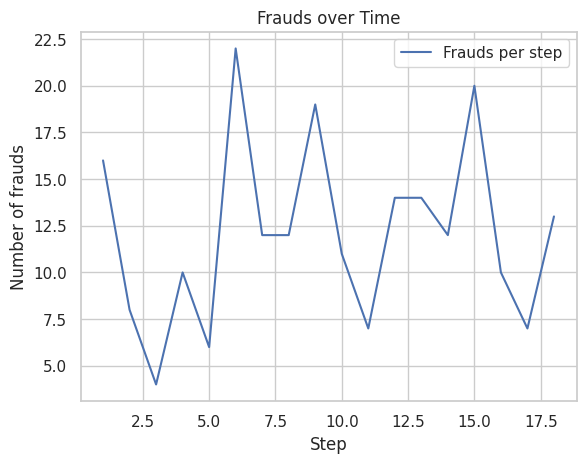

In [ ]:
fraud_per_step = df[df['isFraud'] ==1 ]['step'].value_counts().sort_index()
plt.plot(fraud_per_step.index , fraud_per_step.values,label = "Frauds per step")
plt.xlabel("Step")
plt.ylabel("Number of frauds")
plt.title("Frauds over Time")
plt.legend()
plt.show()

In [ ]:
df.drop(columns = 'step',inplace = True)

In [ ]:
df.head(2)

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0,1864.28,0.0


In [ ]:
top_senders = df['nameOrig'].value_counts().head(10)

In [ ]:
top_senders

,count
nameOrig,
C189326840,2
C119887223,2
C457997071,2
C133857826,2
C745009740,2
C375315317,2
C779875094,2
C1999539787,2
C1840223033,2


In [ ]:
top_recievers = df['nameDest'].value_counts().head(10)

In [ ]:
top_recievers

,count
nameDest,
C985934102,89
C1286084959,87
C248609774,85
C665576141,83
C2083562754,81
C1590550415,78
C977993101,77
C1360767589,76
C451111351,74


In [ ]:
fraud_users = df[df['isFraud']==1]["nameOrig"].value_counts()

In [ ]:
fraud_users

,count
nameOrig,
C1305486145,1
C840083671,1
C1420196421,1
C2101527076,1
C137533655,1
...,...
C1542410200,1
C745648946,1
C365968372,1


In [ ]:
fraud_types = df[df['type'].isin(["TRANSFER","CASH_OUT"])]

In [ ]:
fraud_types['type'].value_counts()

,count
type,
CASH_OUT,152756
TRANSFER,34931


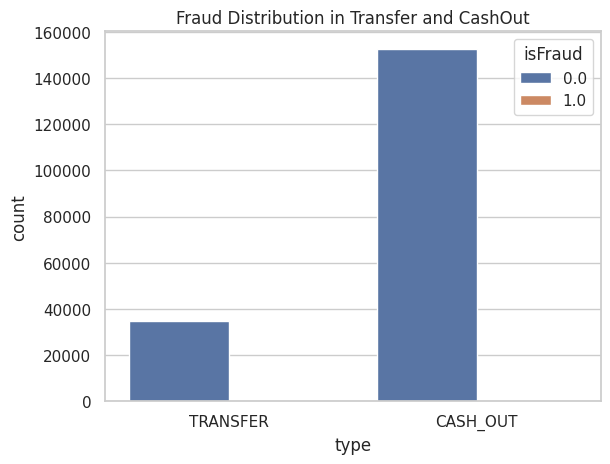

In [ ]:
sns.countplot(data = fraud_types,x = "type",hue = "isFraud")
plt.title("Fraud Distribution in Transfer and CashOut")
plt.show()

In [ ]:
corr = df[["amount",'oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFraud']].corr()

In [ ]:
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.014773,-0.016479,0.213521,0.321059,0.046094
oldbalanceOrg,-0.014773,1.000000,0.999187,0.092942,0.062569,-0.001239
newbalanceOrig,-0.016479,0.999187,1.000000,0.094480,0.061958,-0.006830
oldbalanceDest,0.213521,0.092942,0.094480,1.000000,0.965510,-0.005400
newbalanceDest,0.321059,0.062569,0.061958,0.965510,1.000000,-0.002261
isFraud,0.046094,-0.001239,-0.006830,-0.005400,-0.002261,1.000000


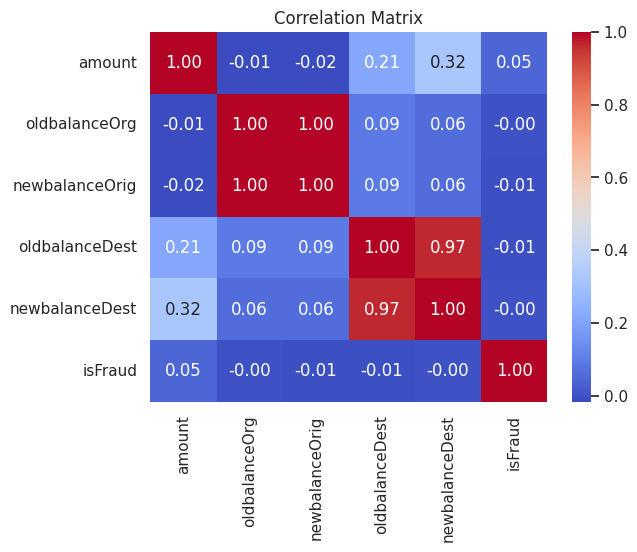

In [ ]:
sns.heatmap(corr, annot = True, cmap = "coolwarm",fmt = '.2f')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
zero_after_transfer = df[
    (df['oldbalanceOrg']>0) &
    (df['newbalanceOrig'] == 0) &
    (df['type'].isin(['TRANSFER','CASH_OUT']))
]

In [ ]:
len(zero_after_transfer)

77638

In [ ]:
zero_after_transfer.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
2,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1.0,0.0,181.0,0.00
3,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1.0,0.0,181.0,-21182.00
15,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0.0,0.0,15325.0,46430.44
19,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0.0,0.0,705.0,-22425.00
24,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0.0,0.0,10835.0,2712905.89


In [ ]:
df['isFraud'].value_counts()

,count
isFraud,
0.0,422827
1.0,217


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


In [ ]:
df_model = df.drop(['nameOrig','nameDest', 'isFlaggedFraud'], axis = 1)

In [ ]:
df_model.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0.0,9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0.0,1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1.0,181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1.0,181.00,-21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0.0,11668.14,0.0


In [ ]:
categorial = ['type']
numerical = ['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

In [ ]:
y= df_model['isFraud']
X= df_model.drop('isFraud',axis = 1)

In [ ]:
# Remove the row where y is NaN (and its corresponding row in X)
valid_indices = ~y.isna()
X = X[valid_indices]
y = y[valid_indices]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [69]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical),
        ('cat', OneHotEncoder(drop='first'), categorial)
    ],
    remainder = 'drop'
)

In [70]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(class_weight='balanced',max_iter=1000))
])

In [71]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [72]:
y_pred = pipeline.predict(X_test)

In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.87      0.93    126849
         1.0       0.00      0.91      0.01        65

    accuracy                           0.87    126914
   macro avg       0.50      0.89      0.47    126914
weighted avg       1.00      0.87      0.93    126914



In [75]:
confusion_matrix(y_test, y_pred)

array([[110457,  16392],
       [     6,     59]])

In [77]:
pipeline.score(X_test,y_test)*100

87.07943962053044

In [78]:
import joblib
joblib.dump(pipeline ,"fraud_detection_pipeline.pkl")

['fraud_detection_pipeline.pkl']